Objetivo Principal Desse Projeto

Identificar padr√µes ou agrupamentos (clusters) nos dados de transa√ß√µes semanais de vendas usando diferentes algoritmos de clusteriza√ß√£o. O foco ser√° no agrupamento de produtos para gerar insights sobre padr√µes de compra e otimizar estrat√©gias de vendas.

Etapas do Projeto

Carregamento e Pr√©-processamento dos Dados

Utilizar a base de dados Sales_Transactions_Dataset_Weekly.csv, que cont√©m informa√ß√µes sobre vendas semanais.
Remover colunas que come√ßam com "Normalized", indicando que os dados normalizados ser√£o recalculados posteriormente.
Escalar (normalizar) os dados para garantir que todas as vari√°veis tenham a mesma influ√™ncia nos algoritmos de clusteriza√ß√£o.

Aplica√ß√£o de Algoritmos de Clusteriza√ß√£o

K-Means: Algoritmo de clusteriza√ß√£o baseado em centroides, com o n√∫mero de clusters (n_clusters) definido previamente.
DBSCAN: Algoritmo baseado em densidade, que identifica clusters com base na proximidade dos pontos e na densidade local.
Agglomerative Clustering: Algoritmo hier√°rquico que agrupa os dados de forma iterativa, utilizando diferentes m√©todos de liga√ß√£o (linkage).

Avalia√ß√£o dos Resultados

Calcular o Silhouette Score para cada algoritmo, avaliando a qualidade dos clusters formados.
Comparar os resultados para determinar qual algoritmo produziu os melhores agrupamentos.

Visualiza√ß√£o

Visualizar os clusters gerados pelos algoritmos para facilitar a interpreta√ß√£o dos resultados e identificar padr√µes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml, make_blobs
import matplotlib.pyplot as plt
import time

# Carregar o conjunto de dados manualmente a partir de um arquivo CSV local
# Baixar o conjunto de dados em https://archive.ics.uci.edu/ml/datasets/Sales_Transactions_Dataset_Weekly
# Salv√°-lo como 'sales_transactions_weekly.csv' no mesmo diret√≥rio que este notebook

#Carregar o conjunto de dados
df = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

# Remover todas as colunas que come√ßam com "Normalized" como foram adicionados dados normalizados removemos para normalizar depois
df_original = df.loc[:, ~df.columns.str.startswith('Normalized')]

X = df_original

In [2]:
# Remover a coluna categ√≥rica "Product_Code" (que n√£o pode ser normalizada)
X = X.drop(columns=["Product_Code"])

In [3]:
# Exibir informa√ß√µes b√°sicas sobre o conjunto de dados
print("Dataset loaded successfully.")
print("Shape of X:", X.shape)


Dataset loaded successfully.
Shape of X: (811, 54)


In [4]:
# Exibir informa√ß√µes b√°sicas sobre os dados
print("\nInforma√ß√µes sobre os dados:")
print(X.info())
print("\nPrimeiras linhas dos dados:")
print(X.head())


Informa√ß√µes sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W0      811 non-null    int64
 1   W1      811 non-null    int64
 2   W2      811 non-null    int64
 3   W3      811 non-null    int64
 4   W4      811 non-null    int64
 5   W5      811 non-null    int64
 6   W6      811 non-null    int64
 7   W7      811 non-null    int64
 8   W8      811 non-null    int64
 9   W9      811 non-null    int64
 10  W10     811 non-null    int64
 11  W11     811 non-null    int64
 12  W12     811 non-null    int64
 13  W13     811 non-null    int64
 14  W14     811 non-null    int64
 15  W15     811 non-null    int64
 16  W16     811 non-null    int64
 17  W17     811 non-null    int64
 18  W18     811 non-null    int64
 19  W19     811 non-null    int64
 20  W20     811 non-null    int64
 21  W21     811 non-null    int64
 22  W22     811 non-nul

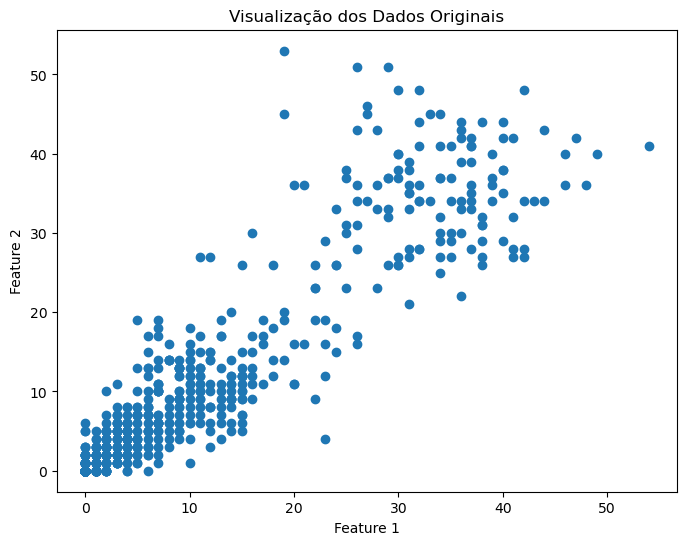

In [18]:
# imprimindo dados originais 
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.title("Visualiza√ß√£o dos Dados Originais")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [19]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
X.isnull().sum()


Valores ausentes por coluna:


W0     0
W1     0
W2     0
W3     0
W4     0
W5     0
W6     0
W7     0
W8     0
W9     0
W10    0
W11    0
W12    0
W13    0
W14    0
W15    0
W16    0
W17    0
W18    0
W19    0
W20    0
W21    0
W22    0
W23    0
W24    0
W25    0
W26    0
W27    0
W28    0
W29    0
W30    0
W31    0
W32    0
W33    0
W34    0
W35    0
W36    0
W37    0
W38    0
W39    0
W40    0
W41    0
W42    0
W43    0
W44    0
W45    0
W46    0
W47    0
W48    0
W49    0
W50    0
W51    0
MIN    0
MAX    0
dtype: int64

In [20]:
# Estat√≠sticas descritivas para colunas num√©ricas
print("\nEstat√≠sticas descritivas para colunas num√©ricas:")
X.describe()


Estat√≠sticas descritivas para colunas num√©ricas:


W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  ...         W44  \
count  811.000000  811.000000  811.000000  811.000000  ...  811.000000   
mean     9.720099    9.585697    9.784217    9.681874  ...    8.434032   
std     13.347375   13.049138   13.550237   13.137916  ...   11.223499   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
75%     13.000000   12.500000   13.000000   13.000000  ...   11.000000   
max     56.000000   62.000000   63.000000   52.000000  ...   46.000000   

              W45         W46         W47         W48         W49         W50  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.556104    8.720099    8.670777    8.674476    8.895191    8.861899   
std     11.382041   11.621684   11.435870   11.222996   10.941375   10.492710   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
50%      4.000000    4.000000    4.000000    4.000000    4.000000    5.000000   
75%     11.000000   11.000000   12.000000   12.000000   12.000000   13.000000   
max     46.000000   55.000000   49.000000   50.000000   52.000000   57.000000   

              W51         MIN         MAX  
count  811.000000  811.000000  811.000000  
mean     8.889026    3.780518   16.308261  
std      9.558011    6.403214   17.150637  
min      0.000000    0.000000    1.000000  
25%      1.000000    0.000000    3.000000  
50%      5.000000    0.000000    9.000000  
75%     14.000000    4.000000   21.000000  
max     73.000000   24.000000   73.000000  

[8 rows x 54 columns]

In [21]:
# normaliza√ß√£o dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.17391867,  0.22859969,  0.04681724, ...,  0.11630659,
        -0.12196992,  0.27372941],
       [-0.15776396, -0.2492208 , -0.49011498, ..., -0.93058184,
        -0.59077375, -0.36804196],
       [-0.15776396,  0.14896294, -0.10659197, ..., -0.19775994,
        -0.12196992, -0.13467055],
       ...,
       [-0.65528791, -0.72704129, -0.72022878, ..., -0.61651531,
        -0.59077375, -0.71809907],
       [-0.73820856, -0.72704129, -0.72022878, ..., -0.93058184,
        -0.59077375, -0.83478477],
       [-0.73820856, -0.64740454, -0.72022878, ..., -0.82589299,
        -0.59077375, -0.77644192]])

In [22]:
# An√°lise de Componentes principais 

from sklearn.decomposition import PCA

# Aplicar PCA para reduzir a dimensionalidade para 20 componentes principais
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Exibir a vari√¢ncia explicada por cada componente principal
print("Vari√¢ncia explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Vari√¢ncia explicada por cada componente principal:
[0.92068087 0.01048955 0.00274952 0.00253139 0.00246011 0.0024244
 0.00235313 0.00229782 0.00214067 0.00206039 0.00195792 0.0019343
 0.00187841 0.00179712 0.00172378 0.00171114 0.00164487 0.00159415
 0.00156913 0.00149521]


Observamos que os 2 componentes principais resumem a maior parte da vari√¢ncia dos dados.

Varia√ß√£o explicada pelos componentes principais: [0.92068087 0.01048955]


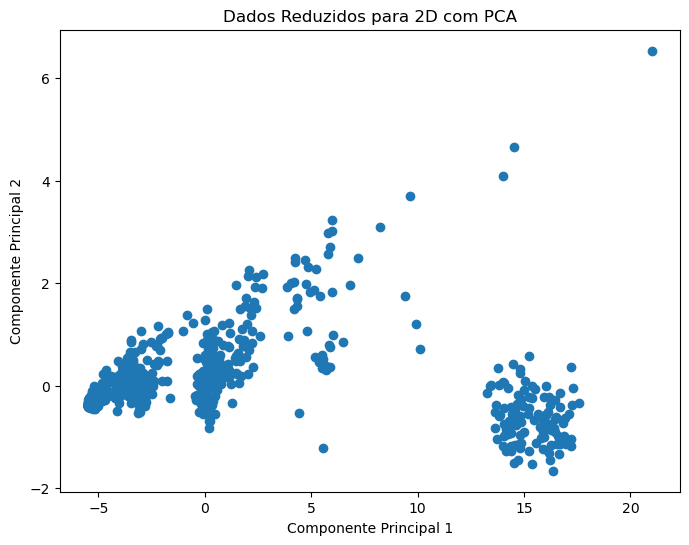

In [24]:
# Aplicar PCA para reduzir a dimensionalidade para 2 componentes
def aplicar_pca(X_scaled, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # Visualizar a varia√ß√£o explicada pelos componentes principais
    print("Varia√ß√£o explicada pelos componentes principais:", pca.explained_variance_ratio_)
    return X_pca

X_pca_2d = aplicar_pca(X_scaled, n_components=2)

# Visualizar os dados reduzidos em 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1])
plt.title("Dados Reduzidos para 2D com PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()  





In [25]:
# Fun√ß√£o para visualizar os dados e os clusters
def visualizar_dados(X_scaled, kmeans_labels, dbscan_labels, agglo_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, label='K-Means')
    plt.title("Clusters Gerados pelo K-Means")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=50, label='DBSCAN')
    plt.title("Clusters Gerados pelo DBSCAN")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', s=50, label='Agglomerative')
    plt.title("Clusters Gerados pelo Agglomerative Clustering")
    plt.xlabel("Feature 1 (Normalizada)")
    plt.ylabel("Feature 2 (Normalizada)")
    plt.colorbar(label="Cluster")
    plt.legend()
    plt.show()


In [12]:
# fun√ß√£o para determinar melhor parametro para o kmeans
def determinar_melhor_k(data, max_k=10):
    """
    Determina o melhor n√∫mero de clusters (K) para o K-Means 
    usando o M√©todo do Cotovelo e a Pontua√ß√£o Silhouette.
    
    Par√¢metros:
    - data: array ou DataFrame com os dados a serem clusterizados.
    - max_k: n√∫mero m√°ximo de clusters a testar (padr√£o: 10).

    Retorna:
    - Melhor valor de K sugerido pelos m√©todos.
    """
    distortions = []  # Armazena a soma dos erros quadr√°ticos
    silhouette_scores = []  # Armazena as pontua√ß√µes Silhouette
    k_values = range(2, max_k + 1)  # Testamos a partir de K=2

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        
        # M√©todo do Cotovelo (In√©rcia)
        distortions.append(kmeans.inertia_)
        
        # M√©todo da Silhouette (se K > 1)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    # Plotando o M√©todo do Cotovelo
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_values, distortions, marker='o', linestyle='--')
    plt.xlabel("N√∫mero de Clusters (K)")
    plt.ylabel("Soma dos Erros Quadr√°ticos (Inertia)")
    plt.title("M√©todo do Cotovelo")

    # Plotando o M√©todo da Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='red')
    plt.xlabel("N√∫mero de Clusters (K)")
    plt.ylabel("Silhouette Score")
    plt.title("Pontua√ß√£o Silhouette")

    plt.show()

    # Melhor K pelo m√©todo da silhouette (maior score)
    melhor_k_silhouette = k_values[np.argmax(silhouette_scores)]
    
    print(f"üîπ Melhor K sugerido pelo M√©todo da Silhouette: {melhor_k_silhouette}")

    return melhor_k_silhouette

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

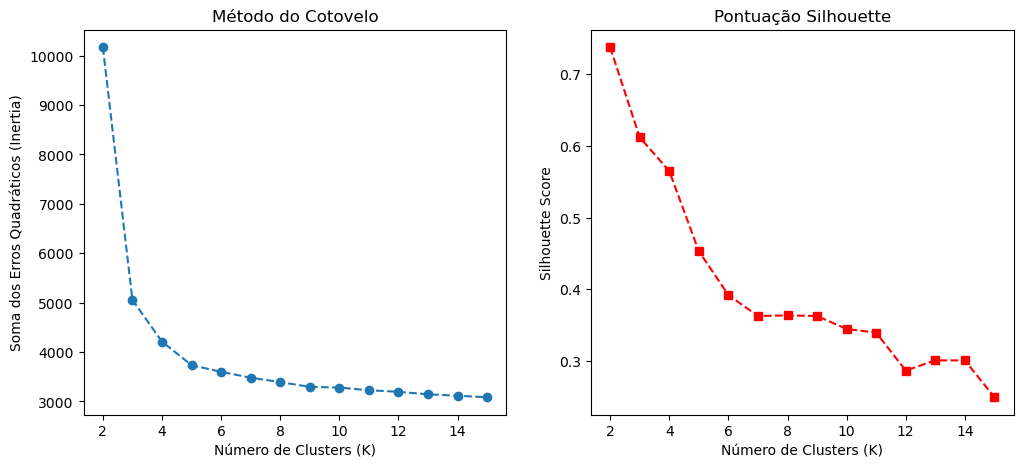

üîπ Melhor K sugerido pelo M√©todo da Silhouette: 2


In [13]:
# Chamando a fun√ß√£o de determinar melhor K para mostrar os resultados
melhor_k = determinar_melhor_k(X_scaled, max_k=15)


In [14]:
# fun√ß√£o para aplicar o kmeans
def aplicar_kmeans(X_scaled, n_clusters, random_state=42):
    """
    Aplica o algoritmo K-Means aos dados escalados.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - n_clusters: n√∫mero de clusters definido previamente.
    - random_state: semente para reprodutibilidade (padr√£o: 42).

    Retorna:
    - labels: r√≥tulos atribu√≠dos pelo K-Means.
    - score: pontua√ß√£o Silhouette.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    
    return labels, score

In [15]:
# fun√ß√£o para determinar os melhores parametros para o DBSCAN
def definir_melhores_parametros_dbscan(X_scaled, eps_range, min_samples_range):
    """
    Define os melhores valores de par√¢metros para o DBSCAN com base na pontua√ß√£o Silhouette.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - eps_range: lista de valores para o par√¢metro eps.
    - min_samples_range: lista de valores para o par√¢metro min_samples.

    Retorna:
    - Um dicion√°rio com os melhores valores de eps, min_samples, a melhor pontua√ß√£o Silhouette e os r√≥tulos correspondentes.
    """
    melhor_score = -1
    melhor_eps = None
    melhor_min_samples = None
    melhor_labels = None

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)
            
            # Calcular a pontua√ß√£o Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_eps = eps
                    melhor_min_samples = min_samples
                    melhor_labels = labels

    return {
        "melhor_eps": melhor_eps,
        "melhor_min_samples": melhor_min_samples,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [16]:
# definindo o intervalo de valores
eps_range = np.linspace(0.05, 2.0, 20)  # Intervalo de valores para o par√¢metro eps
min_samples_range = range(2, 20, 2)    # Intervalo de valores para o par√¢metro min_samples

# chamando a fun√ß√£o de melhores parametros para DBSCAN
melhores_parametros_dbscan = definir_melhores_parametros_dbscan(X_scaled, eps_range, min_samples_range)

# Exibindo os melhores par√¢metros encontrados
print("Melhores par√¢metros para DBSCAN:")
print(f"eps: {melhores_parametros_dbscan['melhor_eps']}")
print(f"min_samples: {melhores_parametros_dbscan['melhor_min_samples']}")
print(f"Silhouette Score: {melhores_parametros_dbscan['melhor_score']}")

Melhores par√¢metros para DBSCAN:
eps: 2.0
min_samples: 6
Silhouette Score: 0.5360519562189752


In [17]:
# fun√ß√£o de aplica√ß√£o do DBSCAN
def aplicar_dbscan(X_scaled, eps=0.5, min_samples=5):
    """
    Aplica o algoritmo DBSCAN aos dados escalados.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - eps: valor para o raio m√°ximo de um ponto vizinho.
    - min_samples: n√∫mero m√≠nimo de pontos para formar um cluster.

    Retorna:
    - labels: r√≥tulos atribu√≠dos pelo DBSCAN.
    - score: pontua√ß√£o Silhouette (se houver mais de um cluster).
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

    # Exibir os r√≥tulos para depura√ß√£o
    print(f"eps={eps}, min_samples={min_samples}, labels={set(labels)}")

    # Calcular a pontua√ß√£o Silhouette apenas se houver pelo menos dois clusters distintos
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Desconsidera ru√≠do (-1)
    score = silhouette_score(X_scaled, labels) if n_clusters > 1 else -1

    return labels, score

In [18]:
def definir_melhores_parametros_agglomerative(X_scaled, cluster_range, linkage_options):
    """
    Define os melhores par√¢metros para o AgglomerativeClustering com base na pontua√ß√£o Silhouette.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - cluster_range: intervalo de valores para o n√∫mero de clusters.
    - linkage_options: lista de op√ß√µes de linkage ('ward', 'complete', 'average', 'single').

    Retorna:
    - Um dicion√°rio com os melhores valores de n√∫mero de clusters, m√©todo de linkage, 
      a melhor pontua√ß√£o Silhouette e os r√≥tulos correspondentes.
    """
    melhor_score = -1
    melhor_n_clusters = None
    melhor_linkage = None
    melhor_labels = None

    for n_clusters in cluster_range:
        for linkage in linkage_options:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            labels = agglo.fit_predict(X_scaled)
            
            # Calcular a pontua√ß√£o Silhouette apenas se houver mais de um cluster
            if len(set(labels)) > 1:
                score = silhouette_score(X_scaled, labels)
                if score > melhor_score:
                    melhor_score = score
                    melhor_n_clusters = n_clusters
                    melhor_linkage = linkage
                    melhor_labels = labels

    return {
        "melhor_n_clusters": melhor_n_clusters,
        "melhor_linkage": melhor_linkage,
        "melhor_score": melhor_score,
        "melhor_labels": melhor_labels
    }

In [19]:
# Definir os intervalos de valores para os par√¢metros
cluster_range = range(2, 10)  # Intervalo de n√∫mero de clusters
linkage_options = ['ward', 'complete', 'average', 'single']  # Op√ß√µes de linkage

# Chamar a fun√ß√£o para encontrar os melhores par√¢metros
melhores_parametros_agglomerative = definir_melhores_parametros_agglomerative(X_scaled, cluster_range, linkage_options)

# Exibir os melhores par√¢metros encontrados
print("Melhores par√¢metros para Agglomerative Clustering:")
print(f"N√∫mero de Clusters: {melhores_parametros_agglomerative['melhor_n_clusters']}")
print(f"M√©todo de Linkage: {melhores_parametros_agglomerative['melhor_linkage']}")
print(f"Silhouette Score: {melhores_parametros_agglomerative['melhor_score']}")

Melhores par√¢metros para Agglomerative Clustering:
N√∫mero de Clusters: 2
M√©todo de Linkage: complete
Silhouette Score: 0.7500116515836492


In [20]:
# fun√ß√£o para aplicar Agglomerative Clustering
def aplicar_agglomerative(X_scaled, n_clusters, linkage='ward'):
    """
    Aplica o Agglomerative Clustering aos dados escalados.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - n_clusters: n√∫mero de clusters definido previamente.
    - linkage: m√©todo de linkage ('ward', 'complete', 'average' ou 'single').

    Retorna:
    - labels: r√≥tulos atribu√≠dos pelo Agglomerative Clustering.
    - score: pontua√ß√£o Silhouette.
    """
    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = agglo.fit_predict(X_scaled)

    # Calcular a pontua√ß√£o Silhouette
    score = silhouette_score(X_scaled, labels) if len(set(labels)) > 1 else -1

    return labels, score

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


eps=2.0, min_samples=6, labels={0, -1}

üîπ Silhouette Scores:
K-Means: 0.73791229767257
DBSCAN: -1
Hier√°rquico Aglomerativo: 0.7500116515836492


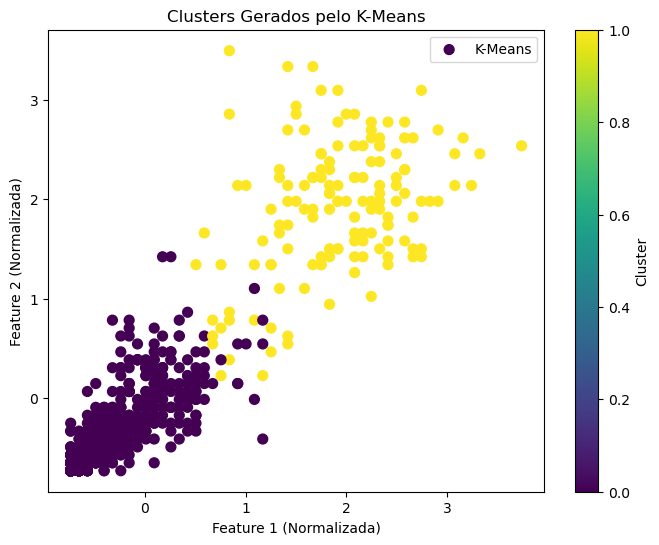

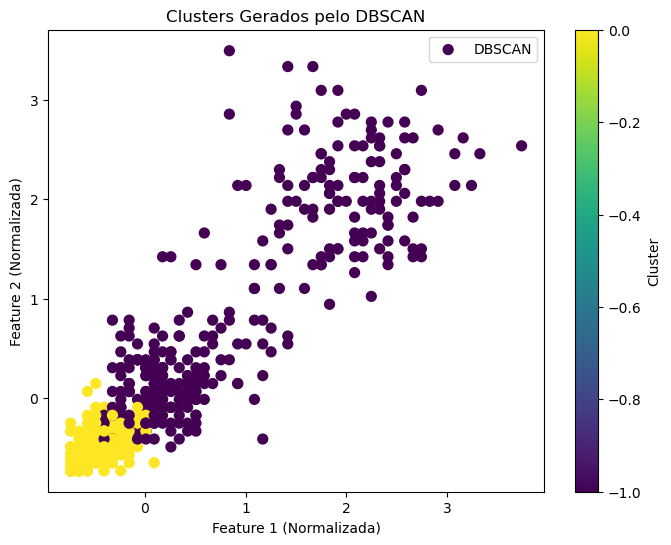

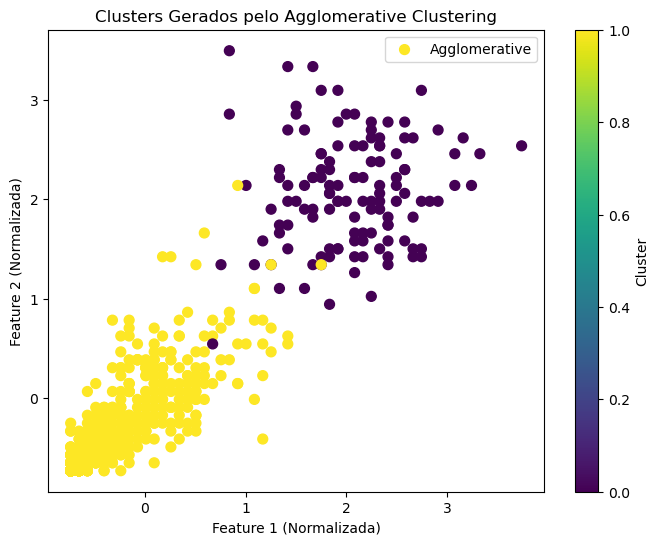

In [21]:
# Garantir que os melhores par√¢metros para K-Means foram encontrados
if melhor_k is not None:
    kmeans_labels, kmeans_score = aplicar_kmeans(X_scaled, n_clusters=melhor_k)
else:
    kmeans_labels, kmeans_score = None, None

# Garantir que os melhores par√¢metros para DBSCAN foram encontrados
if melhores_parametros_dbscan["melhor_eps"] is not None and melhores_parametros_dbscan["melhor_min_samples"] is not None:
    dbscan_labels, dbscan_score = aplicar_dbscan(
        X_scaled, 
        eps=melhores_parametros_dbscan["melhor_eps"], 
        min_samples=melhores_parametros_dbscan["melhor_min_samples"]
    )
else:
    dbscan_labels, dbscan_score = None, None

# Garantir que os melhores par√¢metros para Agglomerative Clustering foram encontrados
if melhores_parametros_agglomerative["melhor_n_clusters"] is not None and melhores_parametros_agglomerative["melhor_linkage"] is not None:
    agglo_labels, agglo_score = aplicar_agglomerative(
        X_scaled, 
        n_clusters=melhores_parametros_agglomerative["melhor_n_clusters"], 
        linkage=melhores_parametros_agglomerative["melhor_linkage"]
    )
else:
    agglo_labels, agglo_score = None, None

# Comparar os resultados
print("\nüîπ Silhouette Scores:")
print(f"K-Means: {kmeans_score if kmeans_score is not None else 'N√£o calculado'}")
print(f"DBSCAN: {dbscan_score if dbscan_score is not None else 'N√£o calculado'}")
print(f"Hier√°rquico Aglomerativo: {agglo_score if agglo_score is not None else 'N√£o calculado'}")

# Visualizar os dados e clusters (somente se os r√≥tulos forem v√°lidos)
visualizar_dados(
    X_scaled, 
    *(label for label in [kmeans_labels, dbscan_labels, agglo_labels] if label is not None)
)


In [22]:
# aplica√ß√£o de valida√ß√£o cruzada
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, rand_score

def validar_clusters(X_scaled, labels_dict, true_labels=None):
    """
    Valida os clusters gerados usando diferentes m√©tricas de avalia√ß√£o.

    Par√¢metros:
    - X_scaled: array com os dados normalizados.
    - labels_dict: dicion√°rio contendo os r√≥tulos dos clusters gerados por diferentes algoritmos.
    - true_labels: array contendo os r√≥tulos verdadeiros (opcional, necess√°rio para Rand Index).

    Retorna:
    - Um dicion√°rio com as m√©tricas calculadas para cada algoritmo.
    """
    resultados = {}

    for algoritmo, labels in labels_dict.items():
        if len(set(labels)) > 1:  # Garantir que h√° mais de um cluster
            silhouette = silhouette_score(X_scaled, labels)
            calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
            davies_bouldin = davies_bouldin_score(X_scaled, labels)

            # Calcular Rand Index apenas se os r√≥tulos verdadeiros forem fornecidos
            rand_index = rand_score(true_labels, labels) if true_labels is not None else None
        else:
            silhouette = calinski_harabasz = davies_bouldin = rand_index = None

        resultados[algoritmo] = {
            "Silhouette Score": silhouette,
            "Calinski-Harabasz Index": calinski_harabasz,
            "Davies-Bouldin Index": davies_bouldin,
            "Rand Index": rand_index if true_labels is not None else "N√£o aplic√°vel"
        }

    return resultados

# Dicion√°rio com os r√≥tulos dos clusters gerados
labels_dict = {
    "K-Means": kmeans_labels,
    "DBSCAN": dbscan_labels,
    "Agglomerative": agglo_labels
}

# Validar os clusters (substitua `true_labels` pelos r√≥tulos reais se dispon√≠veis)
resultados_validacao = validar_clusters(X_scaled, labels_dict, true_labels=None)

# Exibir os resultados
for algoritmo, metricas in resultados_validacao.items():
    print(f"\nüîπ {algoritmo}:")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor if valor is not None else 'N√£o aplic√°vel'}")



üîπ K-Means:
Silhouette Score: 0.73791229767257
Calinski-Harabasz Index: 2674.810522020141
Davies-Bouldin Index: 0.45046329881468705
Rand Index: N√£o aplic√°vel

üîπ DBSCAN:
Silhouette Score: 0.5360519562189752
Calinski-Harabasz Index: 1051.4878009850424
Davies-Bouldin Index: 0.7493664508735947
Rand Index: N√£o aplic√°vel

üîπ Agglomerative:
Silhouette Score: 0.7500116515836492
Calinski-Harabasz Index: 2644.903907782741
Davies-Bouldin Index: 0.3990566944168734
Rand Index: N√£o aplic√°vel


Silhouette Score: Mede a separa√ß√£o entre clusters e a coes√£o dentro deles (quanto maior, melhor).

Calinski-Harabasz Index: Avalia a compacta√ß√£o e separa√ß√£o dos clusters (quanto maior, melhor).

Davies-Bouldin Index: Indica o qu√£o sobrepostos e mal definidos os clusters est√£o (quanto menor, melhor).


| Algoritmo       | Silhouette Score (‚Üë) | CH Index (‚Üë) | DB Index (‚Üì) |
|------------------|-----------------------|--------------|--------------|
| **K-Means**     | 0.7379                | 2674.81 ‚úÖ    | 0.4505       |
| **DBSCAN**      | 0.5360                | 1051.49      | 0.7494       |
| **Agglomerative** | 0.7500 ‚úÖ            | 2644.90      | 0.3990 ‚úÖ    |

**Compara√ß√£o geral:**

- **Agglomerative Clustering** teve o melhor Silhouette Score e o menor Davies-Bouldin Index, sugerindo que seus clusters s√£o mais bem definidos e separados.
- **K-Means** teve o melhor CH Index, indicando clusters bem compactos e separados.
- **DBSCAN** teve os piores scores, indicando que pode n√£o ter sido o melhor m√©todo para esse conjunto de dados.

**Recomenda√ß√£o:**

O melhor algoritmo parece ser o **Agglomerative Clustering**, pois ele teve os melhores valores gerais, mas **K-Means** tamb√©m teve um bom desempenho e pode ser uma alternativa. 

C:\Users\ES90012\AppData\Local\Temp\ipykernel_1388\350125853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Cluster_Agglomerative'] = agglo_labels
C:\Users\ES90012\AppData\Local\Temp\ipykernel_1388\350125853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Weekly_Sales'] = df_original.loc[:, 'W0':'W51'].sum(axis=1)


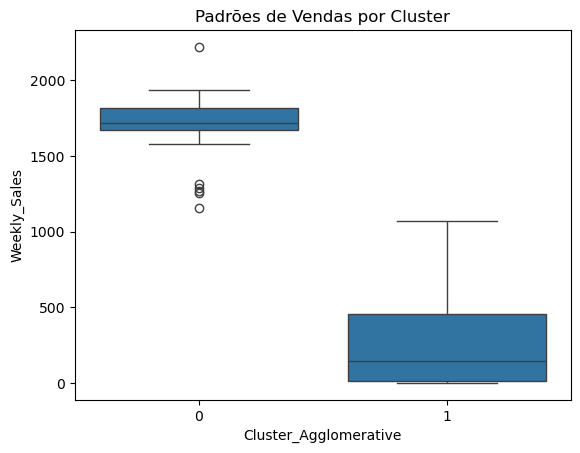

In [23]:
# verificando padr√µes de vendas
if agglo_labels is not None:
    df_original['Cluster_Agglomerative'] = agglo_labels

# Calcular a soma das vendas semanais
df_original['Weekly_Sales'] = df_original.loc[:, 'W0':'W51'].sum(axis=1)

# Visualizar padr√µes de vendas
sns.boxplot(x='Cluster_Agglomerative', y='Weekly_Sales', data=df_original)
plt.title('Padr√µes de Vendas por Cluster')
plt.show()

O gr√°fico boxplot gerado mostra os padr√µes de vendas semanais por cluster utilizando o Agglomerative Clustering. Aqui est√£o algumas interpreta√ß√µes com base na imagem:

Interpreta√ß√£o dos Clusters
O Cluster 0 possui um n√≠vel de vendas mais alto e est√°vel, com uma mediana pr√≥xima a 1.700 vendas semanais.

Apresenta alguns outliers acima e abaixo da faixa principal.

O Cluster 1 tem um comportamento diferente, com vendas significativamente menores, variando entre 0 e 1000.

A mediana parece estar pr√≥xima de 100 a 200 vendas semanais, indicando um perfil de produtos com menor volume de vendas.

A dispers√£o no Cluster 1 √© maior, sugerindo maior variabilidade nos padr√µes de vendas.

Conclus√µes
O modelo Agglomerative Clustering separou dois grupos bem distintos:

Cluster 0 ‚Üí Produtos de alto volume de vendas.

Cluster 1 ‚Üí Produtos com baixas vendas e maior variabilidade.

Isso pode ajudar a entender quais produtos ou lojas precisam de mais aten√ß√£o para estrat√©gias de promo√ß√£o ou otimiza√ß√£o de estoque.

O Cluster 1 pode conter produtos de nicho ou menos populares, enquanto o Cluster 0 pode representar os mais vendidos e essenciais.